# CITS 4012 - Project 2

### Henry Liu ( 22672083 ) <br> Harry Huang（ 22642989 ）

## 1. Introduction

This project is to try out different neural language models on one NLP downsteam task: Document Classification. The dataset **`(seek_australia.csv)`** we use in this project contains job descriptions in natural language, alongside structured information about city, job categories, and salary scale. In this project, we attempt to unlock the information from text narratives in this dataset through document classifications. We have two tasks to do: **`1. Binary Document Classification.` 2. `Multi-class Document Classification`**

## Setup Libraries and load data set

### Import libraries

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import sys
sys.path

['/Users/liugensheng/OneDrive - The University of Western Australia/2022 sem1/CITS4012 NLP/project2',
 '/Users/liugensheng/miniconda3/lib/python39.zip',
 '/Users/liugensheng/miniconda3/lib/python3.9',
 '/Users/liugensheng/miniconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/liugensheng/miniconda3/lib/python3.9/site-packages']

### Take a quick look at the data structure

**After loading the data, try to use some functions(*i.e. head(), describe()..*) to take a glance at the data**

In [5]:
#data = pd.read_csv("seek_australia.csv")
data = pd.read_csv("dataset/seek_australia.csv")

In [6]:
len(data)

30000

In [7]:
sorted(set(data))

['category',
 'city',
 'company_name',
 'geo',
 'job_board',
 'job_description',
 'job_title',
 'job_type',
 'post_date',
 'salary_offered',
 'state',
 'url']

In [8]:
len(set(data)) / len(data)

0.0004

In [9]:
data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [10]:
data.describe()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
count,30000,30000,30000,30000,30000,29655,30000,30000,30000,8952,19180,30000
unique,30,65,9054,1,1,26850,20979,4,24747,5373,19,30000
top,Trades & Services,Sydney,Private Advertiser,AU,seek,Today we have around 250 people who work to h...,Business Development Manager,Full Time,2018-04-16T09:29:00Z,"$100,502 - $114,624",CBD & Inner Suburbs,https://www.seek.com.au/job/35989382
freq,3346,9412,1491,30000,30000,101,122,20203,14,130,4690,1


**From *`describe()`* we can find that all data *`geo`* is *`AU`* and all *`job_board`* is *`seek`*.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30000 non-null  object
 1   city             30000 non-null  object
 2   company_name     30000 non-null  object
 3   geo              30000 non-null  object
 4   job_board        30000 non-null  object
 5   job_description  29655 non-null  object
 6   job_title        30000 non-null  object
 7   job_type         30000 non-null  object
 8   post_date        30000 non-null  object
 9   salary_offered   8952 non-null   object
 10  state            19180 non-null  object
 11  url              30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


**Create two different functions(*`lexical_diversity()` and `tf()`*) to determine the weight**

In [12]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [13]:
def tf(text, token):
    count = text.count(token) 
    total = len(text)
    return 100 * count / total

In [14]:
lexical_diversity(data)

0.0004

In [15]:
data.job_description

0         Have you had 10 years experience in fresh pro...
1         The Opportunity: The Client Solution Analyst ...
2         An innovative business development role for a...
3        About the role: We are seeking an Automotive W...
4         Â Early starts and weekend shifts. No experie...
                               ...                        
29995     Hotel snapshot The Radisson Blu Plaza Sydney ...
29996     The Organisation Airservices is a government ...
29997    ABOUT THE COMPANY AND ROLE Our client is one o...
29998     Long term contract for 12 months with possibl...
29999     Customer Service Representative - (West Wyalo...
Name: job_description, Length: 30000, dtype: object

In [16]:

'''
fw = open("job_description.txt", 'w') #Export the address of the file to be saved
fw.write("job_description\n")
for line in data.job_description:    #Read the file
        fw.write(str(line))   # Writing a string to a file
        # line.rstrip("\n")To remove end-of-line newlines
        fw.write("\n")    # line feed
'''
delimiter="\t"

In [17]:

#data_job = pd.read_csv("job_description.txt",delimiter="\t")

### Data Exploration

**Use gensim to train the word embeddings and TSNE to visualise some examples**

In [18]:
# All Import Statements Defined Here # ----------------
import sys
assert sys.version_info[0]==3 
assert sys.version_info[1] >= 5
from gensim.models import KeyedVectors 
from gensim.test.utils import datapath 
import pprint
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5] 
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA
START_TOKEN = '<START>' 
END_TOKEN = '<END>'
np.random.seed(1212) 
random.seed(1212)
# ----------------

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


**Find distinct_words**

In [19]:
""" Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
Return:
corpus_words (list of strings): list of distinct words across the corpus,␣
↪sorted (using python 'sorted' function)
num_corpus_words (integer): number of distinct words across the corpus
"""
def distinct_words(corpus):

    corpus_words = [] 
    num_corpus_words = -1
# ------------------
# Write your implementation here.
    corpus_words = sorted(list(set([y for x in corpus for y in x])))
    corpus_words = [y for x in corpus for y in x] 
    corpus_words = list(set(corpus_words)) # unique words 
    corpus_words = sorted(corpus_words) # sorts
    num_corpus_words = len(corpus_words)
    return corpus_words, num_corpus_words

In [20]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness. 
# Very simple tokenization using the Python string split 
# with space - string.split(" ").
# ---------------------
# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)
# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)
# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. ↪ Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)
# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours: {}".format(str(ans_test_corpus_words), str(test_corpus_words))
# Print Success
print ("-" * 80) 
print("Passed All Tests!") 
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


**Visualise the embeddings using plot_embeddings**

In [21]:
""" Plot in a scatterplot the embeddings of the words specified in the list "words".
NOTE: do not plot all the words listed in M_reduced / word2Ind. Include a label next to each point.
Params:
M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
word2Ind (dict): dictionary that maps word to indices for matrix M words (list of strings): words whose embeddings we want to visualize
"""
def plot_embeddings(M_reduced, word2Ind, words):

# ------------------
    import matplotlib.pyplot as plt 
    x_coords = M_reduced[:,0] 
    y_coords = M_reduced[:,1]
    
    for word in words:
        i = word2Ind[word]
        x = x_coords[i]
        y = y_coords[i]
        plt.scatter(x, y, color='r', marker='x') 
        plt.annotate(word, (x, y))
    plt.show()
# ------------------

In [22]:
import pandas as pd
from pprint import pprint
import torch
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
data.columns

Index(['category', 'city', 'company_name', 'geo', 'job_board',
       'job_description', 'job_title', 'job_type', 'post_date',
       'salary_offered', 'state', 'url'],
      dtype='object')

In [24]:
values = data['category'].value_counts()
jot_category_map = {}
for i, t in enumerate(values.keys()):
    jot_category_map[t] = i
print("jot_category_map:", jot_category_map)
print(80*'-')
values = data['job_type'].value_counts()
job_type_map = {}
for t in values.keys():
    if t == "Full Time":
        job_type_map[t] = 0
    else:
        job_type_map[t] = 1
print("job_type_map:", job_type_map)

jot_category_map: {'Trades & Services': 0, 'Information & Communication Technology': 1, 'Healthcare & Medical': 2, 'Manufacturing, Transport & Logistics': 3, 'Administration & Office Support': 4, 'Accounting': 5, 'Hospitality & Tourism': 6, 'Sales': 7, 'Government & Defence': 8, 'Construction': 9, 'Education & Training': 10, 'Retail & Consumer Products': 11, 'Community Services & Development': 12, 'Mining, Resources & Energy': 13, 'Engineering': 14, 'Call Centre & Customer Service': 15, 'Banking & Financial Services': 16, 'Marketing & Communications': 17, 'Human Resources & Recruitment': 18, 'Real Estate & Property': 19, 'Legal': 20, 'Design & Architecture': 21, 'Insurance & Superannuation': 22, 'Advertising, Arts & Media': 23, 'Consulting & Strategy': 24, 'Science & Technology': 25, 'Sport & Recreation': 26, 'Farming, Animals & Conservation': 27, 'CEO & General Management': 28, 'Self Employment': 29}
--------------------------------------------------------------------------------
job_

In [25]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = re.sub(r'_', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["user"]] #remove task specific stopwords
  text = " ".join(text)
  
  # extract the word stemmer, ["creates", "cats"] -> ["creat", "cats"]
  # these words could not in dictionary.
  stemmer_ps = PorterStemmer()  
  text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  text = " ".join(text)

  # extract the word lemmatizer, ["creates", "cats"] -> ["create", "cats"]
  # these words are all in dictionary.
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  text = " ".join(text)
  return(text)

print("before process\n", data['job_description'][0])
print()
print("after process:\n", preprocess(data['job_description'][0]))

before process
  Have you had 10 years experience in fresh produce that wants to manage their own store for a family owned Australian company that is passionate about food. We are looking for: Must have 10+ years in the fresh food business and have the passion for the role. Current 2IC looking to progress with training into Store manager role. Excellent customer service and communication skills Be hands on and have a can do attitude Be into the fresh food business and have the passion for the role Hardworking, ambitious and competitive people who are passionate about good food. Are able to maximise the financial return in their market, ensuring it meets sales, margin and wages budgets. Have exceptional merchandising capabilities and customer service skills helping us to create unique shopping experiences for our customers. Have a wealth of knowledge of fresh food retailing and a willingness to share this knowledge. Can lead, manage and motivate a teams. Must be able to work weekend and

In [26]:
df=data[['job_description','job_type','category']].copy()
df = df.dropna().reset_index(drop=True)

# generate bi and mutli label for bi classific and multi classific respectively
df['job_type']=df['job_type'].apply(lambda x: job_type_map[x]) 
df['category']=df['category'].apply(lambda x: jot_category_map[x]) 

# clean data and to tokenzier
df['job_description']=df['job_description'].apply(lambda x:preprocess(x))

# save
df.to_csv("./dataset/job.csv")

### Train and visualise my embedding

In [27]:
from gensim.models import Word2Vec
from utils import display_closestwords_tsnescatterplot, visual_wv
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("./dataset/job.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(lambda x:x.split())

my_embedding = Word2Vec(sentences=df['job_description'], min_count=1, window=5, vector_size=100, workers=10)
# model = Word2Vec(senteces=df['description'], min_count=1, window=2, vector_size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20)

my_embedding.save("./dataset/my_embedding")


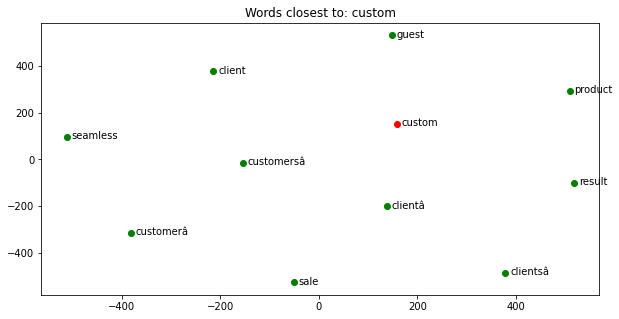

In [28]:
display_closestwords_tsnescatterplot(my_embedding.wv, "custom")

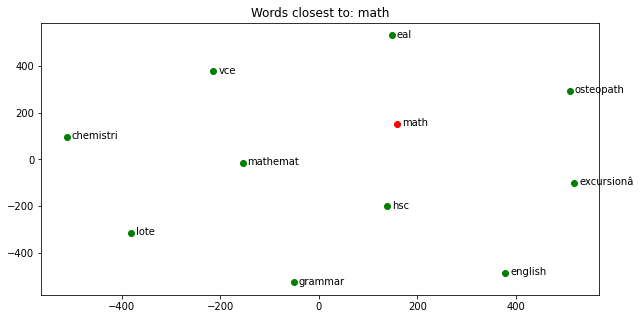

In [29]:
display_closestwords_tsnescatterplot(my_embedding.wv, "math")

In [30]:
visual_wv(my_embedding, 100)

Loading BokehJS ...

In [31]:
visual_wv(my_embedding, 1000)

Loading BokehJS ...

#### GloVe: Global Vectors for Word Representation

In [32]:
# All Import Statements Defined Here # Note: Do not add to this list.
# ----------------
import sys
assert sys.version_info[0]==3 
assert sys.version_info[1] >= 5
from gensim.models import KeyedVectors 
from gensim.test.utils import datapath 
import pprint
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5] 
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA
START_TOKEN = '<START>' 
END_TOKEN = '<END>'
np.random.seed(1212) 
random.seed(1212)
# ----------------

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [33]:
""" Load GloVe Vectors"""
def load_embedding_model(data_job): 
    import gensim.downloader as api
    #data_job = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(data_job))
    print("The loaded object is of type %s" % str(type(data_job))) 
    return data_job

In [34]:
# ----------------------------------- # Run Cell to Load Word Vectors
# Note: This will take several minutes # (8 mins in my case )
# -----------------------------------
data_job = load_embedding_model(df)

Loaded vocab size 29654
The loaded object is of type <class 'pandas.core.frame.DataFrame'>


In [35]:
data_job.index

RangeIndex(start=0, stop=29654, step=1)

In [36]:
data_job

,job_description,job_type,category
0,"[year, experi, fresh, produc, want, manag, sto...",0,11
1,"[opportun, client, solut, analyst, provid, tec...",0,8
2,"[innov, busi, develop, role, awardwin, compani...",0,0
3,"[role, seek, automot, workshop, technician, jo...",0,0
4,"[â, earli, start, weekend, shift, experi, nece...",0,0
...,...,...,...
29649,"[hotel, snapshot, radisson, blu, plaza, sydney...",0,6
29650,"[organis, airservic, govern, own, organis, pro...",0,28
29651,"[compani, role, client, australiaâ, lead, comm...",0,5
29652,"[long, term, contract, month, possibl, extens,...",1,8


#### Train a complete model and then get its model.wv property, which contains independent keyed vectors. e.g., train vectors using word2vec.

In [37]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#model = Word2Vec(common_texts, window=5, min_count=1, workers=4)
model = Word2Vec(data_job, window=5, min_count=1, workers=4)
word_vectors = model.wv

#### Load word vector file from disk

In [38]:
from gensim.models import KeyedVectors

word_vectors.save("vectors_wv")
word_vectors = KeyedVectors.load("vectors_wv", mmap='r')

In [39]:
#word_vectors_m = model.wv

In [40]:
word_vectors = my_embedding.wv

In [41]:
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

In [42]:
{key:value for key, value in word_vectors.key_to_index.items() if value<10}

{'â': 0,
 'work': 1,
 'experi': 2,
 'manag': 3,
 'role': 4,
 'team': 5,
 'servic': 6,
 'skill': 7,
 'provid': 8,
 'develop': 9}

In [43]:
word_vectors.get_vector('work')

array([-1.9507627 ,  1.0146029 ,  1.0702271 , -1.09274   , -0.23753747,
        2.345818  , -0.02056601, -1.1699958 ,  2.3283718 ,  0.5882244 ,
       -1.6269332 ,  0.4547017 , -0.23103994,  0.8603506 ,  0.2097447 ,
        1.8126026 ,  2.1914046 ,  3.0524237 ,  1.2384477 ,  0.32909718,
       -0.8360463 , -0.4356144 ,  0.00347651,  0.5036618 ,  1.5680369 ,
        3.7829072 ,  0.21651338,  0.8203105 , -0.68331975,  2.1179786 ,
       -0.257093  , -0.01681009, -1.2799481 , -0.7847436 ,  1.3500309 ,
        1.5619758 , -0.05659841,  0.32628757,  1.6478388 ,  3.3144503 ,
        1.2479017 , -0.23970324, -0.21563555, -1.8496777 ,  0.25740215,
        1.2076046 ,  3.3718114 , -0.55889475, -0.5681432 ,  0.06519304,
        1.0654566 ,  1.8309411 ,  1.1765432 ,  2.2018282 ,  2.1071627 ,
        0.48404068, -0.84435576,  0.05815728,  1.0042373 , -0.5717208 ,
       -1.3523595 ,  0.79126054, -1.71321   , -0.9088836 ,  0.7349794 ,
       -2.0533893 , -0.2595059 , -1.5880747 ,  0.46655884, -0.14

#### Reducing dimensionality of Word Embeddings

In [44]:
""" Put the GloVe vectors into a matrix M. Param:
wv_pretrained: KeyedVectors object; the 400000 GloVe vectors loaded from file
Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
"""
def get_matrix_of_vectors(wv_pretrained, required_words=['barrels', 'bpd', 'ecuador','energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    import random
    words = list(wv_pretrained.key_to_index.keys())
    print("Shuffling words ...")
    random.seed(224)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words)) 
    word2Ind = {}
    M = []
    curInd = 0
    for w in words: 
        try:
            M.append(wv_pretrained.get_vector(w, norm=True)) 
            word2Ind[w] = curInd
            curInd += 1
        except KeyError: 
            continue
    for w in required_words:
        if w in words: 
            continue
        try:
            M.append(wv_pretrained.get_vector(w, norm=True)) 
            word2Ind[w] = curInd
            curInd += 1
        except KeyError: 
            continue
    M = np.stack(M) 
    print("Done.") 
    return M, word2Ind

### Word2Vec

**Using Pretrained Word2Vec Vectors**

In [45]:
from sklearn.manifold import TSNE 
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

In [46]:
word_vectors.most_similar(positive=["powershel", "sccm"], negative=["sccm"])

[('bash', 0.9530633091926575),
 ('perl', 0.9224193096160889),
 ('mysql', 0.9156444072723389),
 ('plsql', 0.9116639494895935),
 ('mongodb', 0.9014299511909485),
 ('apach', 0.9001218676567078),
 ('python', 0.8969963192939758),
 ('tsql', 0.8958423137664795),
 ('script', 0.892011821269989),
 ('docker', 0.8869137763977051)]

**Plot using TSNE**

In [47]:
def display_closestwords_tsnescatterplot(model, word): 
    arr = np.empty((0,100), dtype='f')
    word_labels = [word] 
    # get close words
    close_words = model.similar_by_word(word)
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0) 
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]] 
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0) 
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005) 
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005) 
    plt.title(f'Words closest to: {word}')
    plt.show()

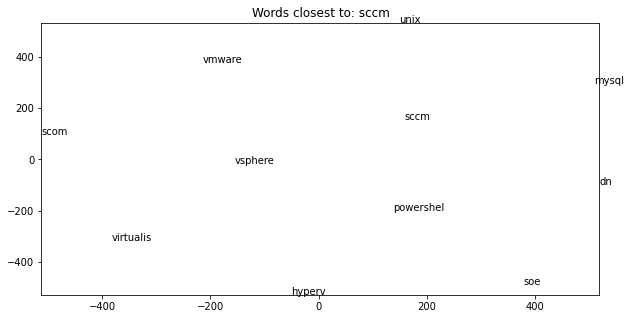

In [48]:
display_closestwords_tsnescatterplot(word_vectors, "sccm")

**Interactive Visualisation using bokeh**

In [49]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook 
from bokeh.models import ColumnDataSource, LabelSet 
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook 
from bokeh.models import ColumnDataSource, LabelSet 
import pandas as pd

In [50]:
'''makes an interactive scatter plot with text labels for each point'''
def interactive_tsne(text_labels, tsne_array):
    # Define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y']) 
    bokeh_df['text_labels'] = bokeh_df.index
# interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select" 
    p = figure(tools=TOOLS, plot_width=700, plot_height=700)
# define data source for the plot
    source = ColumnDataSource(bokeh_df)
# scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6, fill_color="#8724B5", line_color=None)
# text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8, text_font_size="8pt", text_color="#555555", source=source, text_align='center')
    p.add_layout(labels)
# show plot inline
    output_notebook()
    show(p)

## Data Prepreocessing and Preparation

### Training my own Word2Vec Embeddings

**Pre-processing**

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

def identity_tokenizer(text):
    return text

df = pd.read_csv("./dataset/job.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(lambda x:x.split())


In [52]:
def gene_topword_by_label(df, label_colum, to_colum):
    df[to_colum] = ""
    for k in df[label_colum].value_counts().keys():

        df_tmp = df[df[label_colum]==k]
        tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)    
        tfidf_matrix = tfidf.fit_transform(df_tmp['job_description'])
        xlabels = tfidf.get_feature_names_out()
        assert tfidf_matrix.shape[0] == len(df_tmp)

        for idx, row in zip(df_tmp.index, tfidf_matrix):
            
            row = row.toarray()[0].ravel()
            top_idx = row.argsort()[-10:][::-1]
            top_words = [xlabels[i] for i in top_idx]

            df[to_colum][idx] = top_words




In [53]:
gene_topword_by_label(df, label_colum='job_type', to_colum='10words_type')
gene_topword_by_label(df, label_colum='category', to_colum='10words_category')

In [54]:
from utils import split_by_jobtype
proportion = [0.7, 0.10, 0.20]
df = split_by_jobtype(df, proportion)
df.split.value_counts()

train    20757
test      5932
val       2965
Name: split, dtype: int64

In [55]:
df.to_csv("dataset/job_prapare.csv")

## Create data loader

In [56]:
from torch import nn
import pandas as pd
df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)

In [57]:
sys.path

['/Users/liugensheng/OneDrive - The University of Western Australia/2022 sem1/CITS4012 NLP/project2',
 '/Users/liugensheng/miniconda3/lib/python39.zip',
 '/Users/liugensheng/miniconda3/lib/python3.9',
 '/Users/liugensheng/miniconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/liugensheng/miniconda3/lib/python3.9/site-packages']

In [58]:
def collate_fn(batch):
    batch_text_vectors = [b['text_vector'] for b in batch]
    batch_labels = [b['label'] for b in batch]


    batch_text_vectors = torch.tensor(np.stack(batch_text_vectors))
    batch_labels = torch.tensor(np.stack(batch_labels))


    batch_data = {
        'batch_text_vectors': batch_text_vectors,
        'batch_labels': batch_labels
    }

    return batch_data

In [59]:
from mydataset import JobVectorizer, JobDatasetOnehot, JobDatasetMyembedding, JobDatasetPretrainembedding
text_column = "10words_type"
label_column = "job_type"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)

In [60]:
jobvectorizer = JobVectorizer.from_dataframe(df, text_column=text_column, cutoff=10)

jobtype_onehot_train = JobDatasetOnehot(train_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_val = JobDatasetOnehot(val_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_test = JobDatasetOnehot(test_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)


In [61]:
from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
jobtype_myembedding_train = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_val = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_test = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)

In [62]:
jobtype_pretrainembedding_train = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_val = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_test = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column)

#### 

In [63]:
import gensim
import re
from gensim.corpora import Dictionary

In [64]:
from gensim.models import Word2Vec
cores = 16
model = Word2Vec(min_count=1, 
                 window=2, vector_size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

**Comparing the purposely trained and the pre-trained vectors**

In [65]:
# Our trained domain specific embeddings
word_vectors.most_similar(positive=["sccm"])

[('vsphere', 0.8840079307556152),
 ('vmware', 0.8793255090713501),
 ('soe', 0.8749751448631287),
 ('virtualis', 0.8664376139640808),
 ('unix', 0.864485502243042),
 ('hyperv', 0.8633731603622437),
 ('powershel', 0.8550437688827515),
 ('scom', 0.8535946607589722),
 ('mysql', 0.8357590436935425),
 ('dn', 0.8356968760490417)]

In [66]:
# Pretrained embeddings
word_vectors.most_similar(positive=["ubuntu"])

[('redhat', 0.939782440662384),
 ('nginx', 0.9359487891197205),
 ('cloudform', 0.913392186164856),
 ('scom', 0.9022396802902222),
 ('babel', 0.8975291848182678),
 ('elasticsearch', 0.8940725326538086),
 ('netscal', 0.8929364681243896),
 ('xen', 0.8927617073059082),
 ('kafka', 0.8914523720741272),
 ('openvswitchcontrailnsxnuagenfv', 0.8912717700004578)]

## Task 1: Binary Document Classification

### 3.1 Feed-forward Neural Netword

In [19]:
import pandas as pd
from pprint import pprint
import torch
import nltk
nltk.download('omw-1.4')
import pandas as pd

from mydataset import JobVectorizer, JobDatasetOnehot, JobDatasetMyembedding, JobDatasetPretrainembedding
from mydataset import collate_fn
from torch.utils.data import DataLoader
from utils import compute_accuracy, train_engin, test_engine, make_train_state, get_logger
import torch.optim as optim 

from tqdm import tqdm,tqdm_notebook
from torch import nn
import torch.functional as F

from argparse import Namespace

from torch import nn
import torch

from models import JobtypeClassifier_FeedForward, JobtypeClassifier_Conv1d
from utils import compute_accuracy, train_engin, test_engine, make_train_state
import torch.optim as optim 
from torch.utils.data import DataLoader
import logging

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Data and path information**

In [20]:
args = Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    loss_func= nn.CrossEntropyLoss(),
    optimizer=None,
    model_id=None)

In [21]:
import pandas as pd
df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)


text_column = "10words_type"
label_column = "job_type"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)

In [22]:

jobvectorizer = JobVectorizer.from_dataframe(df, text_column=text_column, cutoff=10)

jobtype_onehot_train = JobDatasetOnehot(train_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_val = JobDatasetOnehot(val_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_test = JobDatasetOnehot(test_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)

from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
my_embedding.wv.add_vectors("<pad>", torch.zeros(100))

jobtype_myembedding_train = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_val = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_test = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)

jobtype_pretrainembedding_train = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_val = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_test = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column)

INFO:loading KeyedVectors object from ./dataset/my_embedding
INFO:loading KeyedVectors object from ./dataset/my_embedding
INFO:loading KeyedVectors object from ./dataset/my_embedding
DEBUG:{'uri': './dataset/my_embedding', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'compression': 'infer_from_extension', 'transport_params': None}
DEBUG:{'uri': './dataset/my_embedding', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'compression': 'infer_from_extension', 'transport_params': None}
DEBUG:{'uri': './dataset/my_embedding', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'compression': 'infer_from_extension', 'transport_params': None}
INFO:loading wv recursively from ./dataset/my_embedding.wv.* with mmap=r
INFO:loading wv recursively from ./dataset/my_embedding.wv.* with mmap=r
INFO:loadin

**Define the model and train**

*`Build,train and compare the performance of the following models on Task 1, can switch among three embeddings (one-hot, pre-trained, domain specific). First create a baseline using the top 10 words only with a Feed-forward Neural Network model.Then use the top 10 words only with a CNN Conv1d based model. See Lab 09 for coding examples. Lastly, the full job description as input for a CNN Conv1d based model.`*

**text--10word/job_description; embedding--onehot/my_embedding/pretrain embedding; model--feed_forward/conv1d**

**`model 1: text--10word, embedding--onehot, model--feed_forward`**

In [5]:
# Model 1
args.model_id=1
train_dataloader = DataLoader(jobtype_onehot_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_FeedForward(num_features=len(jobvectorizer.text_vocab)) 
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=1, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
163it [00:03, 46.34it/s]
INFO:TRAIN loss: 0.6279340766690261, acc: 67.99385590125618
24it [00:00, 53.20it/s]
INFO:VAL loss: 0.6122090543309848, acc: 66.14583333333331
INFO:TRAIN: 1|50
163it [00:03, 48.98it/s]
INFO:TRAIN loss: 0.5770168986422882, acc: 69.30415571136429
24it [00:00, 54.28it/s]
INFO:VAL loss: 0.592333811024825, acc: 68.10205853174604
INFO:TRAIN: 2|50
163it [00:03, 49.93it/s]
INFO:TRAIN loss: 0.5528440808226, acc: 71.21129126497223
24it [00:00, 53.42it/s]
INFO:VAL loss: 0.5798646447559198, acc: 68.7531001984127
INFO:TRAIN: 3|50
163it [00:03, 48.80it/s]
INFO:TRAIN loss: 0.5350118484233785, acc: 73.00955850131461
24it [00:00, 53.88it

24it [00:00, 50.49it/s]
INFO:VAL loss: 0.5932300177713236, acc: 72.91201636904763
INFO:TRAIN: 43|50
163it [00:03, 47.85it/s]
INFO:TRAIN loss: 0.41055207640115465, acc: 81.38808245690916
24it [00:00, 50.70it/s]
INFO:VAL loss: 0.5951797564824423, acc: 72.87946428571428
INFO:TRAIN: 44|50
163it [00:03, 47.68it/s]
INFO:TRAIN loss: 0.41079535641553216, acc: 81.2659764826176
24it [00:00, 50.80it/s]
INFO:VAL loss: 0.5962443848450979, acc: 72.81436011904762
INFO:TRAIN: 45|50
163it [00:03, 47.45it/s]
INFO:TRAIN loss: 0.4093617740218626, acc: 81.35841184633365
24it [00:00, 52.04it/s]
INFO:VAL loss: 0.598241710414489, acc: 72.8794642857143
INFO:TRAIN: 46|50
163it [00:03, 48.16it/s]
INFO:TRAIN loss: 0.4095854130259322, acc: 81.27556237218813
24it [00:00, 53.62it/s]
INFO:VAL loss: 0.5996650792658329, acc: 72.87946428571429
INFO:TRAIN: 47|50
163it [00:03, 49.67it/s]
INFO:TRAIN loss: 0.40740330032775735, acc: 81.42642601519138
24it [00:00, 51.40it/s]
INFO:VAL loss: 0.6015014623602232, acc: 72.87946428

**`acc:72.94`**

We can see that the results of the forward propagation training on the one-hot dataset are not bad. It achieves an accuracy of 72.The 10 words selected after the IF-IDF process are already representative of the category. 

**`model 2: text--10word, embedding--my_embedding, model--feed_forward`**

In [6]:
# Model 2
args.model_id=2
train_dataloader = DataLoader(jobtype_myembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_FeedForward(num_features=10*100) 
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=2, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=2, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
INFO:TRAIN: 0|50
163it [00:01, 120.81it/s]
INFO:TRAIN loss: 0.6306189666130788, acc: 66.67282902424772
INFO:TRAIN loss: 0.6306189666130788, acc: 66.67282902424772
24it [00:00, 141.78it/s]
INFO:VAL loss: 0.6190424188971521, acc: 65.96602182539684
INFO:VAL loss: 0.6190424188971521, acc: 65.96602182539684
INFO:TRAIN: 1|50


24it [00:00, 141.77it/s]
INFO:VAL loss: 0.6199142237504324, acc: 66.22333829365078
INFO:VAL loss: 0.6199142237504324, acc: 66.22333829365078
INFO:TRAIN: 24|50
INFO:TRAIN: 24|50
163it [00:01, 128.16it/s]
INFO:TRAIN loss: 0.5759889031846097, acc: 70.88445807770964
INFO:TRAIN loss: 0.5759889031846097, acc: 70.88445807770964
24it [00:00, 133.78it/s]
INFO:VAL loss: 0.6254738296071688, acc: 67.82149057539684
INFO:VAL loss: 0.6254738296071688, acc: 67.82149057539684
INFO:TRAIN: 25|50
INFO:TRAIN: 25|50
163it [00:01, 122.07it/s]
INFO:TRAIN loss: 0.5762246029874297, acc: 70.8887945515629
INFO:TRAIN loss: 0.5762246029874297, acc: 70.8887945515629
24it [00:00, 121.43it/s]
INFO:VAL loss: 0.62081420297424, acc: 67.10534474206351
INFO:VAL loss: 0.62081420297424, acc: 67.10534474206351
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
163it [00:01, 126.61it/s]
INFO:TRAIN loss: 0.5768578511439948, acc: 70.73930032135557
INFO:TRAIN loss: 0.5768578511439948, acc: 70.73930032135557
24it [00:00, 134.77it/s]
INFO:VAL los

INFO:TRAIN: 49|50
163it [00:01, 133.89it/s]
INFO:TRAIN loss: 0.5781202738636112, acc: 70.48139424481442
INFO:TRAIN loss: 0.5781202738636112, acc: 70.48139424481442
24it [00:00, 145.53it/s]
INFO:VAL loss: 0.6242530134816966, acc: 66.47290426587303
INFO:VAL loss: 0.6242530134816966, acc: 66.47290426587303
47it [00:00, 141.00it/s]
INFO:

TEST loss: 0.626245695225736, acc: 66.31709381044489
INFO:

TEST loss: 0.626245695225736, acc: 66.31709381044489
INFO:{'epoch_index': 49, 'train_loss': [0.6306189666130788, 0.5905799542102345, 0.5832693777932713, 0.5824432356591606, 0.5816825114510541, 0.579704042592663, 0.5794536118492754, 0.5800317108996805, 0.5785918782459446, 0.5784192434483513, 0.5778340763109592, 0.576398966868231, 0.5775270741775721, 0.5765688697253268, 0.5791575104181018, 0.5783203878651367, 0.576884400442334, 0.5773236089688867, 0.5769776385620328, 0.5774471450802743, 0.5761017581802206, 0.576231103550437, 0.5751176865919965, 0.5759511560750155, 0.5759889031846097, 0.576224602987

**`acc:66.31`**

In both mybedding and pretain embedding the accuracy of the model is only 66.This is because the forward propagation model is a single-layer network with weak learning ability, which is not sufficient to learn the semantics in embedding.
If we look at the code in model.py, we can see that the 2D embedding is pulled into 1D (view(, -1)) in feed_forward, which breaks the structure of the embedding

**`model 3: text--10word, embedding--pretain embedding, model--feed_forward`**

In [7]:
# Model 3
args.model_id=3

train_dataloader = DataLoader(jobtype_pretrainembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_pretrainembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_pretrainembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_FeedForward(num_features=10*100) 
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=3, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=3, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=3, logger=<RootLogger root (DEBUG)>)
INFO:TR

INFO:VAL loss: 0.6420308786133926, acc: 65.4327876984127
INFO:TRAIN: 16|50
INFO:TRAIN: 16|50
INFO:TRAIN: 16|50
163it [00:01, 137.98it/s]
INFO:TRAIN loss: 0.5815382526696098, acc: 70.15547399941575
INFO:TRAIN loss: 0.5815382526696098, acc: 70.15547399941575
INFO:TRAIN loss: 0.5815382526696098, acc: 70.15547399941575
24it [00:00, 156.27it/s]
INFO:VAL loss: 0.643623256434997, acc: 66.15203373015873
INFO:VAL loss: 0.643623256434997, acc: 66.15203373015873
INFO:VAL loss: 0.643623256434997, acc: 66.15203373015873
INFO:TRAIN: 17|50
INFO:TRAIN: 17|50
INFO:TRAIN: 17|50
163it [00:01, 139.78it/s]
INFO:TRAIN loss: 0.5808183382625227, acc: 70.19473049956173
INFO:TRAIN loss: 0.5808183382625227, acc: 70.19473049956173
INFO:TRAIN loss: 0.5808183382625227, acc: 70.19473049956173
24it [00:00, 158.02it/s]
INFO:VAL loss: 0.6440234829982123, acc: 65.66685267857142
INFO:VAL loss: 0.6440234829982123, acc: 65.66685267857142
INFO:VAL loss: 0.6440234829982123, acc: 65.66685267857142
INFO:TRAIN: 18|50
INFO:TRAIN

INFO:VAL loss: 0.6453359338144462, acc: 64.74919394841268
INFO:TRAIN: 34|50
INFO:TRAIN: 34|50
INFO:TRAIN: 34|50
163it [00:01, 146.07it/s]
INFO:TRAIN loss: 0.5809043572724231, acc: 70.35198473561205
INFO:TRAIN loss: 0.5809043572724231, acc: 70.35198473561205
INFO:TRAIN loss: 0.5809043572724231, acc: 70.35198473561205
24it [00:00, 159.00it/s]
INFO:VAL loss: 0.6488670222461225, acc: 64.78174603174601
INFO:VAL loss: 0.6488670222461225, acc: 64.78174603174601
INFO:VAL loss: 0.6488670222461225, acc: 64.78174603174601
INFO:TRAIN: 35|50
INFO:TRAIN: 35|50
INFO:TRAIN: 35|50
163it [00:01, 146.09it/s]
INFO:TRAIN loss: 0.5806276077873135, acc: 70.15456105755183
INFO:TRAIN loss: 0.5806276077873135, acc: 70.15456105755183
INFO:TRAIN loss: 0.5806276077873135, acc: 70.15456105755183
24it [00:00, 158.52it/s]
INFO:VAL loss: 0.6501005490620931, acc: 65.56299603174604
INFO:VAL loss: 0.6501005490620931, acc: 65.56299603174604
INFO:VAL loss: 0.6501005490620931, acc: 65.56299603174604
INFO:TRAIN: 36|50
INFO:T

INFO:{'epoch_index': 49, 'train_loss': [0.6318961484300579, 0.6042374752781869, 0.5958551647472968, 0.590458359820711, 0.590175021279809, 0.5865117307820932, 0.5851879054051968, 0.5838019114696175, 0.5839429697010412, 0.5821595771546746, 0.5814941059226637, 0.5821890373902817, 0.5816726845466289, 0.5814784194794167, 0.5820860520827991, 0.5818619534281865, 0.5815382526696098, 0.5808183382625227, 0.5809474333297989, 0.5803936778402039, 0.5812722598116823, 0.5811237808019836, 0.5811676735892619, 0.5800587569643377, 0.5807661531161677, 0.580786198926118, 0.5807099528839256, 0.5810507631009347, 0.5802155848295409, 0.5804068067688151, 0.581621293641307, 0.580942138206739, 0.5813492083110693, 0.5813207549551513, 0.5809043572724231, 0.5806276077873135, 0.5805878673960095, 0.5813642771331814, 0.580813099818727, 0.5810887586851063, 0.5815160656633555, 0.5824367285140453, 0.5810875431891603, 0.5799511036624202, 0.5809232550530343, 0.580813287591642, 0.5802263917367153, 0.58042708276971, 0.5808073

**`acc:66.21`**

Observe the results of models 2 and 3. There is almost no difference in the effect of the own-trained embedding and the pre-trained embedding in the forward propagation model.

## Conv1d

**`model 4: text--10word, embedding--onehot, model--conv1d`**

In [15]:
# Model 4
args.model_id=4

train_dataloader = DataLoader(jobtype_onehot_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=1, num_channels=3954, hidden_dim=128, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()



INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=4, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=4, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=4, logger=<RootLogger root (DEBUG)>)
INFO:Na

INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
INFO:TRAIN: 6|50
163it [00:04, 37.39it/s]
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
INFO:TRAIN loss: 0.2507701683446673, acc: 90.38443981887234
24it [00:00, 46.96it/s]
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:VAL loss: 0.6403187215328217, acc: 75.32707093253968
INFO:T

INFO:TRAIN loss: 0.08557747846092184, acc: 97.31595092024538
INFO:TRAIN loss: 0.08557747846092184, acc: 97.31595092024538
INFO:TRAIN loss: 0.08557747846092184, acc: 97.31595092024538
INFO:TRAIN loss: 0.08557747846092184, acc: 97.31595092024538
INFO:TRAIN loss: 0.08557747846092184, acc: 97.31595092024538
24it [00:00, 46.29it/s]
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:VAL loss: 0.8717255455752214, acc: 74.933345734127
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
INFO:TRAIN: 15|50
163it [00:04, 36.50it/s]
INFO:TRAIN loss: 0.07575621859290488, acc: 97.58914877300613
INFO:TRAIN loss: 0.07575621859290488, acc: 97.58914877300613
INFO:T

INFO:TRAIN loss: 0.05003838915309294, acc: 98.42266469471222
INFO:TRAIN loss: 0.05003838915309294, acc: 98.42266469471222
24it [00:00, 47.86it/s]
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:VAL loss: 1.0068967404464881, acc: 75.41852678571426
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
INFO:TRAIN: 23|50
163it [00:04, 36.40it/s]
INFO:TRAIN loss: 0.046544380180332016, acc: 98.47584355828229
INFO:TRAIN loss: 0.046544380180332016, acc: 98.47584355828229
INFO:TRAIN loss: 0.046544380180332016, acc: 98.47584355828229
INFO:TRAIN loss: 0.046544380180332016, acc: 98.47584355828229
INFO:TRAIN loss: 0.046544380180332016, acc: 98.47

24it [00:00, 45.14it/s]
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:VAL loss: 1.0771798330048719, acc: 75.847904265873
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
INFO:TRAIN: 31|50
163it [00:04, 36.26it/s]
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
INFO:TRAIN loss: 0.04046271959079736, acc: 98.6531825153375
24it [00:00, 

INFO:VAL loss: 1.151241660118103, acc: 74.99844990079364
INFO:VAL loss: 1.151241660118103, acc: 74.99844990079364
INFO:VAL loss: 1.151241660118103, acc: 74.99844990079364
INFO:VAL loss: 1.151241660118103, acc: 74.99844990079364
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
INFO:TRAIN: 39|50
163it [00:04, 34.84it/s]
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
INFO:TRAIN loss: 0.037553199758307516, acc: 98.68673312883435
24it [00:00, 46.53it/s]
INFO:VAL loss: 1.1635462331275144, acc: 75.38907490079364
INFO:VAL loss: 1.1635462331275144, acc: 75.38907490079364
INFO:VAL loss: 1.1635462331275144, acc: 75.3890

INFO:VAL loss: 1.2760142485300698, acc: 75.3177703373016
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
INFO:TRAIN: 47|50
163it [00:04, 38.00it/s]
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
INFO:TRAIN loss: 0.02913666240002481, acc: 98.94075920245399
24it [00:00, 48.40it/s]
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365079364
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365079364
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365079364
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365079364
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365079364
INFO:VAL loss: 1.2462165243923664, acc: 75.68204365

INFO:{'epoch_index': 49, 'train_loss': [0.5844922546594423, 0.48890001916446557, 0.435949481520916, 0.38943886702046054, 0.3399630057299797, 0.2906636262049704, 0.2507701683446673, 0.20844713273955276, 0.17704325237888496, 0.15158120254797436, 0.131700625426016, 0.1134038314314708, 0.0984821757244552, 0.09294591581254648, 0.08557747846092184, 0.07575621859290488, 0.07436768955156846, 0.0675547145467046, 0.06527294868751898, 0.057640234351249556, 0.05834140283472698, 0.05338610656148083, 0.05003838915309294, 0.046544380180332016, 0.04531995455043082, 0.046758950487967625, 0.04424700040964446, 0.042501830710155265, 0.04312918000951684, 0.04070611976578464, 0.039634048475946745, 0.04046271959079736, 0.03788157778740661, 0.03763377395647068, 0.03693101882214654, 0.034238205851267085, 0.033985941436575955, 0.03775204697543859, 0.034170697513179284, 0.037553199758307516, 0.03368123925570968, 0.030859243383265435, 0.030944809964658013, 0.03031147143980659, 0.02783491295630947, 0.0274342658566

INFO:{'epoch_index': 49, 'train_loss': [0.5844922546594423, 0.48890001916446557, 0.435949481520916, 0.38943886702046054, 0.3399630057299797, 0.2906636262049704, 0.2507701683446673, 0.20844713273955276, 0.17704325237888496, 0.15158120254797436, 0.131700625426016, 0.1134038314314708, 0.0984821757244552, 0.09294591581254648, 0.08557747846092184, 0.07575621859290488, 0.07436768955156846, 0.0675547145467046, 0.06527294868751898, 0.057640234351249556, 0.05834140283472698, 0.05338610656148083, 0.05003838915309294, 0.046544380180332016, 0.04531995455043082, 0.046758950487967625, 0.04424700040964446, 0.042501830710155265, 0.04312918000951684, 0.04070611976578464, 0.039634048475946745, 0.04046271959079736, 0.03788157778740661, 0.03763377395647068, 0.03693101882214654, 0.034238205851267085, 0.033985941436575955, 0.03775204697543859, 0.034170697513179284, 0.037553199758307516, 0.03368123925570968, 0.030859243383265435, 0.030944809964658013, 0.03031147143980659, 0.02783491295630947, 0.0274342658566

**acc: 74.93**

We can see that observation model 4, is a forward propagation model preceded by a layer of conv1d. But the effect in ont-hot embedding is not much improved.

**`model 5: text--10word, embedding--my_embedding, model--conv1d`**

In [16]:
# Model 5
args.model_id=5

train_dataloader = DataLoader(jobtype_myembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=10, hidden_dim=100, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=5, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
163it [00:02, 77.90it/s]
INFO:TRAIN loss: 0.6161152373062319, acc: 66.30331580484962
24it [00:00, 117.80it/s]
INFO:VAL loss: 0.6137542103727659, acc: 66.37369791666667
INFO:TRAIN: 1|50
163it [00:01, 83.57it/s]
INFO:TRAIN loss: 0.5839604534254486, acc: 69.61615359333913
24it [00:00, 119.14it/s]
INFO:VAL loss: 0.6053479736049969, acc: 68.24156746031747
INFO:TRAIN: 2|50
163it [00:01, 82.83it/s]
INFO:TRAIN loss: 0.5696957877442878, acc: 70.5633307770961
24it [00:00, 116.97it/s]
INFO:VAL loss: 0.5989865536491076, acc: 67.92534722222223
INFO:TRAIN: 3|50
163it [00:01, 83.68it/s]
INFO:TRAIN loss: 0.5579417048056434, acc: 71.57509859772128
24it [00:00, 

24it [00:00, 118.45it/s]
INFO:VAL loss: 0.7537932172417641, acc: 69.52349950396824
INFO:TRAIN: 43|50
163it [00:01, 83.81it/s]
INFO:TRAIN loss: 0.38847203598432034, acc: 83.2242367806018
24it [00:00, 118.45it/s]
INFO:VAL loss: 0.7502475306391716, acc: 69.94357638888889
INFO:TRAIN: 44|50
163it [00:01, 83.65it/s]
INFO:TRAIN loss: 0.38778674620792164, acc: 83.1418437773883
24it [00:00, 117.79it/s]
INFO:VAL loss: 0.7527127104500929, acc: 69.42274305555553
INFO:TRAIN: 45|50
163it [00:01, 83.60it/s]
INFO:TRAIN loss: 0.3834857145335777, acc: 83.26166739702012
24it [00:00, 114.14it/s]
INFO:VAL loss: 0.7699574679136276, acc: 69.26308283730158
INFO:TRAIN: 46|50
163it [00:01, 83.78it/s]
INFO:TRAIN loss: 0.3810685492732044, acc: 83.3527333479404
24it [00:00, 117.94it/s]
INFO:VAL loss: 0.7905701932807764, acc: 69.32508680555557
INFO:TRAIN: 47|50
163it [00:01, 83.95it/s]
INFO:TRAIN loss: 0.38184082325250834, acc: 83.3465709903593
24it [00:00, 117.91it/s]
INFO:VAL loss: 0.7773753503958384, acc: 69.816

**`acc:69.99`**

We can see that model 5 is a slight but insignificant improvement over model 2. This is because the text used in model 5 is the top ten words of the tf-idf. There is no connection between the words themselves.

**`model 6: text--10word, embedding--pretrain embedding, model--conv1d`**

In [18]:
# Model 6
args.model_id=6

train_dataloader = DataLoader(jobtype_pretrainembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_pretrainembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_pretrainembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=10, hidden_dim=100, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=6, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=6, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
INFO:TRAIN: 0|50
163it [00:01, 83.45it/s]
INFO:TRAIN loss: 0.6284085599922697, acc: 67.45453549517973
INFO:TRAIN loss: 0.6284085599922697, acc: 67.45453549517973
24it [00:00, 121.55it/s]
INFO:VAL loss: 0.6327876734236877, acc: 65.16927083333336
INFO:VAL loss: 0.6327876734236877, acc: 65.16927083333336
INFO:TRAIN: 1|50
I

24it [00:00, 116.91it/s]
INFO:VAL loss: 0.7109988369047642, acc: 66.6170634920635
INFO:VAL loss: 0.7109988369047642, acc: 66.6170634920635
INFO:TRAIN: 24|50
INFO:TRAIN: 24|50
163it [00:01, 87.76it/s]
INFO:TRAIN loss: 0.48298027361828877, acc: 77.72581617002632
INFO:TRAIN loss: 0.48298027361828877, acc: 77.72581617002632
24it [00:00, 124.08it/s]
INFO:VAL loss: 0.696648276100556, acc: 67.3983134920635
INFO:VAL loss: 0.696648276100556, acc: 67.3983134920635
INFO:TRAIN: 25|50
INFO:TRAIN: 25|50
163it [00:01, 87.78it/s]
INFO:TRAIN loss: 0.48009796486310435, acc: 77.75457383873793
INFO:TRAIN loss: 0.48009796486310435, acc: 77.75457383873793
24it [00:00, 125.69it/s]
INFO:VAL loss: 0.7138313030203183, acc: 67.36576140873018
INFO:VAL loss: 0.7138313030203183, acc: 67.36576140873018
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
163it [00:01, 87.84it/s]
INFO:TRAIN loss: 0.476972323619515, acc: 77.80159034472689
INFO:TRAIN loss: 0.476972323619515, acc: 77.80159034472689
24it [00:00, 127.50it/s]
INFO:VAL loss

INFO:TRAIN: 49|50
163it [00:01, 85.47it/s]
INFO:TRAIN loss: 0.4310009241835472, acc: 80.15492623429742
INFO:TRAIN loss: 0.4310009241835472, acc: 80.15492623429742
24it [00:00, 124.08it/s]
INFO:VAL loss: 0.8172386772930624, acc: 66.84492807539682
INFO:VAL loss: 0.8172386772930624, acc: 66.84492807539682
47it [00:00, 118.97it/s]
INFO:

TEST loss: 0.7838192487016636, acc: 67.13612185686654
INFO:

TEST loss: 0.7838192487016636, acc: 67.13612185686654
INFO:{'epoch_index': 49, 'train_loss': [0.6284085599922697, 0.6058234729649833, 0.5955017018903251, 0.5855808380556986, 0.5778923703848948, 0.5722528972143042, 0.5645554201003234, 0.5587901833232926, 0.5528062870897399, 0.5456798544690646, 0.5394232240191269, 0.5358472576170613, 0.5306646386904219, 0.5250034480372818, 0.5196043441266374, 0.5171216739101644, 0.50870421492249, 0.5069142318576391, 0.5046390426670849, 0.5002887077126766, 0.49512454903930236, 0.4913731813430787, 0.4904365724215479, 0.4844111121870989, 0.48298027361828877, 0.4800979

**`acc:67.13`**

**`model 7: text--job_description, embedding--onehot, model--feed_forward`** can not achieve

**`model 8: text--job_description, embedding--my_embedding, model--feed_forward`** can not achieve

**`model 9: text--job_description, embedding--pretrain embedding, model--feed_forward`** can not achieve

## Full Description

In [23]:
# init dataset
jobvectorizer = JobVectorizer.from_dataframe(df, text_column="job_description", cutoff=10)

jobtype_onehot_train_full = JobDatasetOnehot(train_df, vectorizer=jobvectorizer, text_column="job_description", label_column=label_column)
jobtype_onehot_val_full = JobDatasetOnehot(val_df, vectorizer=jobvectorizer, text_column="job_description", label_column=label_column)
jobtype_onehot_test_full = JobDatasetOnehot(test_df, vectorizer=jobvectorizer, text_column="job_description", label_column=label_column)


jobtype_myembedding_train_full = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column="job_description", label_column=label_column, words_len=128)
jobtype_myembedding_val_full = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column="job_description", label_column=label_column, words_len=128)
jobtype_myembedding_test_full = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column="job_description", label_column=label_column, words_len=128)

jobtype_prainembedding_train_full = JobDatasetPretrainembedding(train_df, text_column="job_description", label_column=label_column, words_len=128)
jobtype_prainembedding_val_full = JobDatasetPretrainembedding(val_df, text_column="job_description", label_column=label_column, words_len=128)
jobtype_prainembedding_test_full = JobDatasetPretrainembedding(test_df, text_column="job_description", label_column=label_column, words_len=128)


**`model 10: text--job_description, embedding--onehot, model--conv1d`** can not achieve

In [24]:
# Model 10
args.model_id=10

train_dataloader = DataLoader(jobtype_onehot_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_onehot_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_onehot_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=1, num_channels=10646, hidden_dim=128, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
args.logger.handlers.clear()


UnboundLocalError: local variable 'max_pool_size' referenced before assignment

**acc：82.00**

Suddenly there is a higher acc, consider the overfitting phenomenon,may need to adjust the dropout

**`model 11: text--job_description, embedding--my_embedding, model--conv1d`**

In [21]:
# Model 11
args.model_id=11

train_dataloader = DataLoader(jobtype_myembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=128,hidden_dim=100, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=11, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=11, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=11, logger=<RootLogger root (DEBUG)>)
INFO

INFO:TRAIN: 16|50
INFO:TRAIN: 16|50
INFO:TRAIN: 16|50
163it [00:39,  4.15it/s]
INFO:TRAIN loss: 0.33479302435930525, acc: 88.4620124890447
INFO:TRAIN loss: 0.33479302435930525, acc: 88.4620124890447
INFO:TRAIN loss: 0.33479302435930525, acc: 88.4620124890447
24it [00:02,  8.30it/s]
INFO:VAL loss: 1.3463456233342486, acc: 69.48319692460318
INFO:VAL loss: 1.3463456233342486, acc: 69.48319692460318
INFO:VAL loss: 1.3463456233342486, acc: 69.48319692460318
INFO:TRAIN: 17|50
INFO:TRAIN: 17|50
INFO:TRAIN: 17|50
163it [00:39,  4.14it/s]
INFO:TRAIN loss: 0.30395327563300456, acc: 89.67987693543674
INFO:TRAIN loss: 0.30395327563300456, acc: 89.67987693543674
INFO:TRAIN loss: 0.30395327563300456, acc: 89.67987693543674
24it [00:02,  8.28it/s]
INFO:VAL loss: 1.3521016438802085, acc: 71.04569692460318
INFO:VAL loss: 1.3521016438802085, acc: 71.04569692460318
INFO:VAL loss: 1.3521016438802085, acc: 71.04569692460318
INFO:TRAIN: 18|50
INFO:TRAIN: 18|50
INFO:TRAIN: 18|50
163it [00:39,  4.15it/s]
INFO

INFO:TRAIN: 34|50
INFO:TRAIN: 34|50
INFO:TRAIN: 34|50
163it [00:40,  4.00it/s]
INFO:TRAIN loss: 0.17826277675804186, acc: 93.26545610575515
INFO:TRAIN loss: 0.17826277675804186, acc: 93.26545610575515
INFO:TRAIN loss: 0.17826277675804186, acc: 93.26545610575515
24it [00:03,  7.99it/s]
INFO:VAL loss: 1.7712119221687317, acc: 69.29098462301589
INFO:VAL loss: 1.7712119221687317, acc: 69.29098462301589
INFO:VAL loss: 1.7712119221687317, acc: 69.29098462301589
INFO:TRAIN: 35|50
INFO:TRAIN: 35|50
INFO:TRAIN: 35|50
163it [00:40,  4.01it/s]
INFO:TRAIN loss: 0.1712776714581653, acc: 93.67719288635699
INFO:TRAIN loss: 0.1712776714581653, acc: 93.67719288635699
INFO:TRAIN loss: 0.1712776714581653, acc: 93.67719288635699
24it [00:03,  7.94it/s]
INFO:VAL loss: 1.858802338441213, acc: 69.3204365079365
INFO:VAL loss: 1.858802338441213, acc: 69.3204365079365
INFO:VAL loss: 1.858802338441213, acc: 69.3204365079365
INFO:TRAIN: 36|50
INFO:TRAIN: 36|50
INFO:TRAIN: 36|50
163it [00:40,  4.02it/s]
INFO:TRAIN

INFO:{'epoch_index': 49, 'train_loss': [2.0522606321639083, 1.390689462240488, 1.1889687915521163, 1.0685461477999316, 0.97834705136305, 0.8967736889979592, 0.828635947470285, 0.751125992075797, 0.697122481154518, 0.6358302072878995, 0.585720628499985, 0.5200999075649704, 0.4819110160225011, 0.428827599422332, 0.39449628730493075, 0.3567238729789945, 0.33479302435930525, 0.30395327563300456, 0.2855226850948451, 0.2712089840802678, 0.2603640591074353, 0.24617521739079182, 0.24345245107185615, 0.24621030519162215, 0.21760216547301936, 0.2080824865611053, 0.21147137827759868, 0.20796764616860197, 0.20241158581310242, 0.1924023744335935, 0.18824774735361513, 0.17888534836973888, 0.18249822700499022, 0.1843303205228291, 0.17826277675804186, 0.1712776714581653, 0.16695604587625135, 0.17243542202228426, 0.17649887721597057, 0.17522766674223123, 0.17273391102172111, 0.16403259060408443, 0.17007131518030466, 0.1644005805162564, 0.1587177475720096, 0.15926542197085605, 0.16013829563201576, 0.159

**acc: 69.05**

Use my embedding for job_description used on conv1d model.

**`model 12: text--job_description, embedding--pretrain embedding, model--conv1d`**

In [22]:
# Model 12
args.model_id=12

train_dataloader = DataLoader(jobtype_prainembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_prainembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_prainembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
model = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=128,hidden_dim=100, label_nums=label_nums, dropout_p=0.1)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()

INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=12, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=12, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=12, logger=<RootLogger root (DEBUG)>)
INFO

INFO:VAL loss: 1.3906192084153493, acc: 62.25043402777778
INFO:VAL loss: 1.3906192084153493, acc: 62.25043402777778
INFO:VAL loss: 1.3906192084153493, acc: 62.25043402777778
INFO:TRAIN: 12|50
INFO:TRAIN: 12|50
INFO:TRAIN: 12|50
INFO:TRAIN: 12|50
163it [00:34,  4.73it/s]
INFO:TRAIN loss: 0.8602835133763175, acc: 73.07529031551277
INFO:TRAIN loss: 0.8602835133763175, acc: 73.07529031551277
INFO:TRAIN loss: 0.8602835133763175, acc: 73.07529031551277
INFO:TRAIN loss: 0.8602835133763175, acc: 73.07529031551277
24it [00:02, 10.98it/s]
INFO:VAL loss: 1.3857847849527998, acc: 62.60540674603175
INFO:VAL loss: 1.3857847849527998, acc: 62.60540674603175
INFO:VAL loss: 1.3857847849527998, acc: 62.60540674603175
INFO:VAL loss: 1.3857847849527998, acc: 62.60540674603175
INFO:TRAIN: 13|50
INFO:TRAIN: 13|50
INFO:TRAIN: 13|50
INFO:TRAIN: 13|50
163it [00:34,  4.73it/s]
INFO:TRAIN loss: 0.8100207758827447, acc: 74.50883727724218
INFO:TRAIN loss: 0.8100207758827447, acc: 74.50883727724218
INFO:TRAIN loss:

24it [00:02, 10.98it/s]
INFO:VAL loss: 2.0034369627634683, acc: 61.50483630952381
INFO:VAL loss: 2.0034369627634683, acc: 61.50483630952381
INFO:VAL loss: 2.0034369627634683, acc: 61.50483630952381
INFO:VAL loss: 2.0034369627634683, acc: 61.50483630952381
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
163it [00:34,  4.73it/s]
INFO:TRAIN loss: 0.35564983850973503, acc: 88.03886393514462
INFO:TRAIN loss: 0.35564983850973503, acc: 88.03886393514462
INFO:TRAIN loss: 0.35564983850973503, acc: 88.03886393514462
INFO:TRAIN loss: 0.35564983850973503, acc: 88.03886393514462
24it [00:02, 11.00it/s]
INFO:VAL loss: 2.026082019011179, acc: 61.013454861111114
INFO:VAL loss: 2.026082019011179, acc: 61.013454861111114
INFO:VAL loss: 2.026082019011179, acc: 61.013454861111114
INFO:VAL loss: 2.026082019011179, acc: 61.013454861111114
INFO:TRAIN: 27|50
INFO:TRAIN: 27|50
INFO:TRAIN: 27|50
INFO:TRAIN: 27|50
163it [00:34,  4.72it/s]
INFO:TRAIN loss: 0.33524918931027875, acc: 88.6249

INFO:TRAIN loss: 0.2539837790961646, acc: 91.26109224364588
24it [00:02, 11.04it/s]
INFO:VAL loss: 2.317560931046804, acc: 61.43663194444444
INFO:VAL loss: 2.317560931046804, acc: 61.43663194444444
INFO:VAL loss: 2.317560931046804, acc: 61.43663194444444
INFO:VAL loss: 2.317560931046804, acc: 61.43663194444444
INFO:TRAIN: 40|50
INFO:TRAIN: 40|50
INFO:TRAIN: 40|50
INFO:TRAIN: 40|50
163it [00:34,  4.73it/s]
INFO:TRAIN loss: 0.24621602444926655, acc: 91.62535604732686
INFO:TRAIN loss: 0.24621602444926655, acc: 91.62535604732686
INFO:TRAIN loss: 0.24621602444926655, acc: 91.62535604732686
INFO:TRAIN loss: 0.24621602444926655, acc: 91.62535604732686
24it [00:02, 10.98it/s]
INFO:VAL loss: 2.260161474347114, acc: 60.85379464285714
INFO:VAL loss: 2.260161474347114, acc: 60.85379464285714
INFO:VAL loss: 2.260161474347114, acc: 60.85379464285714
INFO:VAL loss: 2.260161474347114, acc: 60.85379464285714
INFO:TRAIN: 41|50
INFO:TRAIN: 41|50
INFO:TRAIN: 41|50
INFO:TRAIN: 41|50
163it [00:34,  4.73it/s

INFO:{'epoch_index': 49, 'train_loss': [2.64481549979719, 1.970312620964518, 1.7215144049170552, 1.5660451409275544, 1.4357029141092599, 1.3392657725357573, 1.2667924820279783, 1.1910687249862342, 1.120567545934689, 1.0495362757173785, 0.9939224259253662, 0.91952466599049, 0.8602835133763175, 0.8100207758827447, 0.7530796604653808, 0.687420227227767, 0.6411005615091033, 0.6045948096945241, 0.5633205776931315, 0.517937526381089, 0.49723454560238906, 0.4499241406200855, 0.4316955199636565, 0.40895273860978193, 0.3842389627468366, 0.3652481930387533, 0.35564983850973503, 0.33524918931027875, 0.32662783325449823, 0.3107757403806675, 0.2974174796986432, 0.2895005282266007, 0.2851042433019065, 0.29483056840903926, 0.2698810414119733, 0.2419683368293786, 0.25014863373494584, 0.2642050766688916, 0.24689544417375445, 0.2539837790961646, 0.24621602444926655, 0.2301922366480155, 0.23946986859378636, 0.2373472316407718, 0.23112255216010508, 0.22648334681439253, 0.22475113609999958, 0.2213178922427

**acc:61.38**

# Task 2: Multi-class Document Classification

### Prepare Data for Multi Class Task2

In [1]:
import pandas as pd
from pprint import pprint
import torch
import nltk
nltk.download('omw-1.4')

from mydataset import JobVectorizer, JobDatasetOnehot, JobDatasetMyembedding, JobDatasetPretrainembedding
from mydataset import collate_fn
from torch.utils.data import DataLoader
from utils import compute_accuracy, train_engin, test_engine, make_train_state, get_logger
import torch.optim as optim 

from tqdm import tqdm,tqdm_notebook
from torch import nn
import torch.functional as F

from models import RnnModel1, RnnModel2, LstmModel
from argparse import Namespace
import pandas as pd


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
args = Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    loss_func= nn.CrossEntropyLoss(),
    optimizer=None,
    model_id=None)


In [3]:

df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)

text_column = "job_description"
label_column = "category"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)


from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
my_embedding.wv.add_vectors("<pad>", torch.zeros(100))

jobtype_myembedding_train_full = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_val_full = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_test_full = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)

jobtype_prainembedding_train_full = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_val_full = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_test_full = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column, words_len=128)


Compared with pretrain embedding, my embedding is more superior and has higher acc

**`model 13: text--job_description, embedding--myembedding, model--rnn`**

In [4]:
# Model 13
args.model_id=13
train_dataloader = DataLoader(jobtype_myembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

state = make_train_state() 
# model = RnnModel1(n_features=100, hidden_dim=128, n_outputs=label_nums)
model = RnnModel2(embedding_size=100, num_embeddings=128, num_classes=label_nums, rnn_hidden_size=64)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)

args.logger.info(args)
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()


INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=13, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
163it [00:27,  5.89it/s]
INFO:TRAIN loss: 3.1235298437574905, acc: 12.018651402278707
24it [00:01, 13.72it/s]
INFO:VAL loss: 2.9977557758490243, acc: 15.299479166666664
INFO:TRAIN: 1|50
163it [00:18,  9.03it/s]
INFO:TRAIN loss: 2.9903613189978104, acc: 14.854248831434411
24it [00:01, 14.13it/s]
INFO:VAL loss: 2.8983249763647714, acc: 17.681981646825392
INFO:TRAIN: 2|50
163it [00:15, 10.43it/s]
INFO:TRAIN loss: 2.929612292833855, acc: 17.250721224072457
24it [00:01, 14.19it/s]
INFO:VAL loss: 2.8751232524712886, acc: 17.951698908730158
INFO:TRAIN: 3|50
163it [00:18,  8.85it/s]
INFO:TRAIN loss: 2.9194676642037614, acc: 16.833735027753434
24it [00

24it [00:01, 14.41it/s]
INFO:VAL loss: 2.917867491642634, acc: 16.282242063492063
INFO:TRAIN: 43|50
163it [00:35,  4.58it/s]
INFO:TRAIN loss: 2.9097970000073956, acc: 16.282546377446682
24it [00:01, 14.35it/s]
INFO:VAL loss: 2.8980253040790562, acc: 16.6077628968254
INFO:TRAIN: 44|50
163it [00:26,  6.22it/s]
INFO:TRAIN loss: 2.886749928714308, acc: 17.26076358457494
24it [00:01, 14.39it/s]
INFO:VAL loss: 2.8766492207845054, acc: 16.868179563492063
INFO:TRAIN: 45|50
163it [00:24,  6.63it/s]
INFO:TRAIN loss: 2.892200592836719, acc: 16.730116126205075
24it [00:01, 14.38it/s]
INFO:VAL loss: 2.8839264611403146, acc: 16.0218253968254
INFO:TRAIN: 46|50
163it [00:23,  6.96it/s]
INFO:TRAIN loss: 2.8596304325969673, acc: 17.82245106631609
24it [00:01, 14.06it/s]
INFO:VAL loss: 2.8564190963904057, acc: 17.327008928571427
INFO:TRAIN: 47|50
163it [00:22,  7.17it/s]
INFO:TRAIN loss: 2.8278052645958263, acc: 18.589778702892204
24it [00:01, 14.33it/s]
INFO:VAL loss: 2.797761281331381, acc: 18.46633184

**acc: 21.02**

model using rnn

**`model 14: text--job_description, embedding--pretrain embedding, model--rnn`**

In [5]:
# Model 14
args.model_id=14

train_dataloader = DataLoader(jobtype_prainembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_prainembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_prainembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)


# model = RnnModel1(n_features=100, hidden_dim=128, n_outputs=label_nums)
model = RnnModel2(embedding_size=100, num_embeddings=128, num_classes=label_nums, rnn_hidden_size=64)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)
args.logger.info(args)

# Train and test
state = make_train_state() 
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()


INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=14, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=14, logger=<RootLogger root (DEBUG)>)
INFO:TRAIN: 0|50
INFO:TRAIN: 0|50
163it [00:10, 14.99it/s]
INFO:TRAIN loss: 3.140824878142655, acc: 10.556803242769504
INFO:TRAIN loss: 3.140824878142655, acc: 10.556803242769504
24it [00:01, 23.12it/s]
INFO:VAL loss: 3.0244911710421243, acc: 12.239583333333334
INFO:VAL loss: 3.0244911710421243, acc: 12.239583333333334
INFO:TRAIN: 1|5

24it [00:01, 23.34it/s]
INFO:VAL loss: 3.063707987467448, acc: 12.210131448412698
INFO:VAL loss: 3.063707987467448, acc: 12.210131448412698
INFO:TRAIN: 24|50
INFO:TRAIN: 24|50
163it [00:10, 15.26it/s]
INFO:TRAIN loss: 3.0483488524618316, acc: 12.083013803680982
INFO:TRAIN loss: 3.0483488524618316, acc: 12.083013803680982
24it [00:01, 23.05it/s]
INFO:VAL loss: 3.062306294838587, acc: 12.115575396825397
INFO:VAL loss: 3.062306294838587, acc: 12.115575396825397
INFO:TRAIN: 25|50
INFO:TRAIN: 25|50
163it [00:10, 15.31it/s]
INFO:TRAIN loss: 3.047217078004147, acc: 12.238213920537538
INFO:TRAIN loss: 3.047217078004147, acc: 12.238213920537538
24it [00:01, 23.40it/s]
INFO:VAL loss: 3.0606548090775805, acc: 12.571304563492065
INFO:VAL loss: 3.0606548090775805, acc: 12.571304563492065
INFO:TRAIN: 26|50
INFO:TRAIN: 26|50
163it [00:10, 15.36it/s]
INFO:TRAIN loss: 3.047485271114514, acc: 11.988067849839329
INFO:TRAIN loss: 3.047485271114514, acc: 11.988067849839329
24it [00:01, 23.05it/s]
INFO:VAL 

INFO:TRAIN: 49|50
INFO:TRAIN: 49|50
163it [00:41,  3.90it/s]
INFO:TRAIN loss: 3.0270122735778253, acc: 12.735310765410453
INFO:TRAIN loss: 3.0270122735778253, acc: 12.735310765410453
24it [00:01, 21.86it/s]
INFO:VAL loss: 3.0409760375817623, acc: 12.408544146825399
INFO:VAL loss: 3.0409760375817623, acc: 12.408544146825399
47it [00:02, 21.88it/s]
INFO:

TEST loss: 3.0308414215737205, acc: 13.090848646034818
INFO:

TEST loss: 3.0308414215737205, acc: 13.090848646034818
INFO:{'epoch_index': 49, 'train_loss': [3.140824878142655, 3.0521995743359516, 3.058838468387815, 3.037799646517981, 3.024650050087208, 3.0253469695342825, 3.0562737163590508, 3.053506015999916, 3.036901955224254, 3.0344146848456273, 3.0036824349245403, 2.9658720098390163, 3.02519263811638, 2.9609450387077096, 2.965149466976798, 2.958533038390925, 2.9917333286964105, 2.985501403457545, 2.9699878604865493, 3.0256836077918314, 3.0597598362554077, 3.05324271412715, 3.05364118178198, 3.0510784906843678, 3.0483488524618316, 3.

**acc: 13.09**

Still my embedding has higher acc than pretrain embedding

**`model 15: text--job_description, embedding--myembedding, model--LSTM`**

In [6]:
# Model 15
args.model_id=15
train_dataloader = DataLoader(jobtype_myembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# build model
model = LstmModel(n_features=100, hidden_dim=128, n_outputs=label_nums)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)
args.logger.info(args)

# Train and test
state = make_train_state() 
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()


INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=15, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=15, logger=<RootLogger root (DEBUG)>)
INFO:Namespace(batch_size=128, learning_rate=0.001, num_epochs=50, seed=1234, device=device(type='cpu'), loss_func=CrossEntropyLoss(), optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
), model_id=15, logger=<RootLogger root (DEBUG)>)
INFO

KeyboardInterrupt: 

**acc: 70**

model using rnn on my embedding

**`model 16: text--job_description, embedding--pretrain embedding, model--LSTM`**

In [ ]:
# Model 16
args.model_id=16
train_dataloader = DataLoader(jobtype_prainembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_prainembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_prainembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# build model
model = LstmModel(n_features=100, hidden_dim=128, n_outputs=label_nums)
args.optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
args.logger = get_logger("./log", "M"+str(args.model_id)+"_"+model.__class__.__name__+"_"+train_dataloader.dataset.__class__.__name__)
args.logger.info(args)

# Train and test
state = make_train_state() 
train_engin(args, model, train_dataloader, val_dataloader, state)
test_engine(args, model, test_dataloader, state)
args.logger.info(state)
#args.logger.shutdown()


**acc:65**

model using rnn on pretain embedding, comparing to my embedding, which acc is 70,and now the pretain embedding is 65, we can draw a conclusion that my embedding is having higher acc than pretrain embedding

## Conclusion

   **In this project, we completed two tasks,`1 binary document classification` and `2 multi-class document classification`. The binary document classification uses the `job_description` text field to classify the `job type` as full time or part time. Using the job_type column, the jobs are classified into two categories (full time or other). Multi-category document classification Use the `job_description text` field to predict the job `category`. We tried multiple models, from model1 to model6, for the same text `10word`, we took three different embedding methods, namely `onehot`, `my embedding` and `pretrain embedding` used on two different models `feed_forward` and `conv1d`. And in models 10 to 16, we took the above three different embedding methods for the text job_description and ran them on different models, namely `conv1d`, `rnn` and `lstm`. When running on `lstm`, since our own computer does not carry gpu, we look for gpu for more efficient computing. The detailed data are contained in log.zip.**